In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")
df.head(3)

/tmp/ipykernel_20/155855035.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.iloc[:,0:20]
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

# Convert 'created_at' column to datetime
# Extract year, month, and month name from 'created_at'



In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.sort_values(by = 'created_at')

df['Year'] = df['created_at'].dt.year
df['Month'] = df['created_at'].dt.month
df['Month_Name'] = df['created_at'].dt.month_name()

df.head(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Month_Name
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,July
375,211540.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,360.0,100147746,Beauty & Grooming,C-MUX-30078,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,July


## Rename column name

In [2]:
df.rename(columns={'category_name_1':'Category'},inplace=True)
df.columns

NameError: ignored

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Let's perform EDA</p>

In [ ]:
selling_item=df.groupby('Category')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(selling_item)

              Category   count
9    Mobiles & Tablets  115710
8        Men's Fashion   92221
14     Women's Fashion   59721
0           Appliances   52413
13          Superstore   43613
1    Beauty & Grooming   41496
12             Soghaat   34011
10              Others   29218
6        Home & Living   26504
4        Entertainment   26326
5      Health & Sports   17502
7          Kids & Baby   16494
3            Computing   15933
15                  \N    7850
11  School & Education    3478
2                Books    1870


In [3]:
plt.figure(figsize=(10,4))
graph=sns.barplot(data=selling_item,x="Category",y="count")
graph.set_title('Top selling Items')
plt.xticks(rotation=90)
plt.show()

NameError: ignored

In [ ]:
stat=df.groupby('status')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(stat)

            status   count
4         complete  233685
1         canceled  201249
14        received   77290
8   order_refunded   59529
15          refund    8050
3              cod    2859
9             paid    1159
2           closed     494
10  payment_review      57
11         pending      48
13      processing      33
7           holded      31
6            fraud      10
12  pending_paypal       7
0               \N       4
5         exchange       4


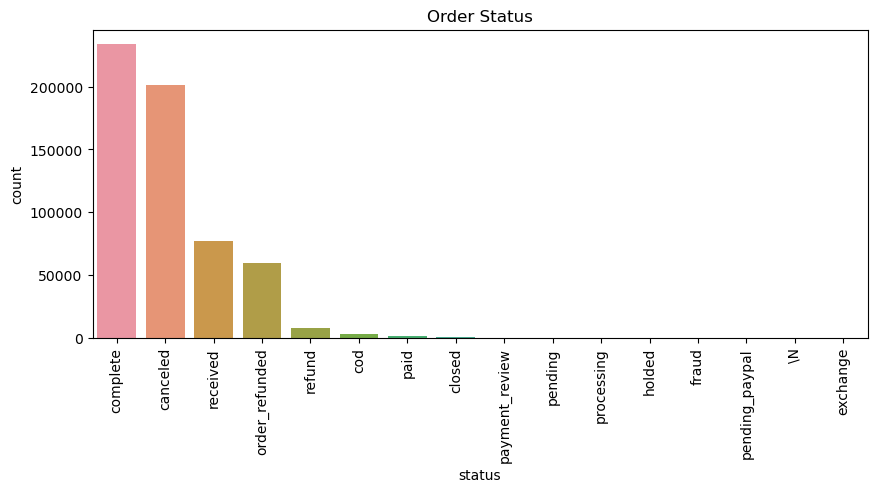

In [ ]:
plt.figure(figsize=(10,4))
df1=sns.barplot(data=stat,x="status",y="count")
df1.set_title('Order Status')
plt.xticks(rotation=90)
plt.show()

In [ ]:
pay_met=df.groupby('payment_method')['item_id'].agg(['count']).reset_index().sort_values(by='count',ascending=False)
print(pay_met)

       payment_method   count
6                 cod  271960
2             Payaxis   97641
0             Easypay   82900
12         jazzwallet   35145
8     easypay_voucher   31176
4         bankalfalah   23065
11        jazzvoucher   15633
1          Easypay_MA   14028
7      customercredit    7555
3                 apg    1758
17      ublcreditcard     882
5      cashatdoorstep     732
14            mcblite     723
15          mygateway     669
10    internetbanking     472
16      productcredit     125
13   marketingexpense      45
9   financesettlement      15


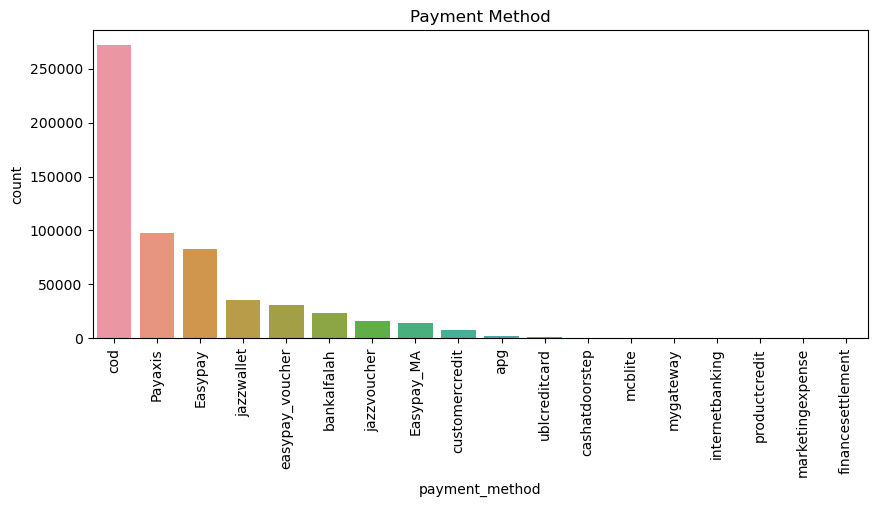

In [ ]:
plt.figure(figsize=(10,4))
df1=sns.barplot(data=pay_met,x="payment_method",y="count")
df1.set_title('Payment Method')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px


In [ ]:
status=df.groupby(['Category','status'])['grand_total'].sum().reset_index()
status
graph=px.bar(status,x='Category',y='grand_total',color='status')
graph.show()

In [ ]:
category=df.groupby(['Category'])['grand_total'].sum().reset_index()
graph=px.bar(category,x='Category',y='grand_total',text='grand_total')
graph.update_traces(texttemplate='%{text:.2s}', textposition='outside')
graph.show()

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Sales Trend in Each Year</p>

In [ ]:
df_cat_sort_2016 = df[df['Year'] == 2016].groupby('created_at')['grand_total'].sum().reset_index().sort_values('created_at', ascending=True)

# Filter data for 2017
df_cat_sort_2017 = df[df['Year'] == 2017].groupby('created_at')['grand_total'].sum().reset_index().sort_values('created_at', ascending=True)

# Filter data for 2018
df_cat_sort_2018 = df[df['Year'] == 2018].groupby('created_at')['grand_total'].sum().reset_index().sort_values('created_at', ascending=True)


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, subplot_titles=("Sales trend in Year 2016", "Sales trend in Year 2017", "Sales trend in Year 2018"))

fig.add_trace(go.Scatter(
    x=df_cat_sort_2016["created_at"],
    y=df_cat_sort_2016["grand_total"],
    name="Sales in 2016",
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_cat_sort_2017["created_at"],
    y=df_cat_sort_2017["grand_total"],
    name="Sales in 2017",
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=df_cat_sort_2018["created_at"],
    y=df_cat_sort_2018["grand_total"],
    name="Sales in 2018",
), row=3, col=1)

fig.update_layout(height=800, width=800, title_text="Sales Trend in Each Year")
fig.update_xaxes(title_text="Created At")
fig.update_yaxes(title_text="Grand Total")

fig.show()


# <p style="background-color:#289F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> IF YOU LIKED .DOUPVOTE</p>